In [ ]:
# ctrl+clik = https://colab.research.google.com/drive/1LGwnXuZmFvc5oRwZJWBBJwmbJ1vogs64?usp=sharing#scrollTo=90e5fd2e-1bea-40df-9465-15747b85ed11

#import library
import pandas as pd
import numpy as np
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10,15)
rcParams['lines.linewidth'] = 2.5

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
!gdown --id 1y0f_w7uOMaJ11FPaSwf1FJtadcZISiL_ # Download File

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1y0f_w7uOMaJ11FPaSwf1FJtadcZISiL_
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 33.9MB/s]


In [ ]:
#Read Dataset
df = pd.read_csv('flight.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## 1. Descriptive Statistic

In [ ]:
#Merubah judul kolom menjadi huruf kecil
df.columns = [c.lower() for c in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

In [ ]:
# mengelompokan kolom berdasarkan jenis data kolom numerik
nums = []
for i in df.columns:
    if df[i].dtype != 'object':
        nums.append(i)
print(f'ada {len(nums)} kolom numerik, yaitu: \n{nums}')

ada 15 kolom numerik, yaitu: 
['member_no', 'ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum', 'point_notflight']


In [ ]:
# mengelompokan kolom berdasarkan jenis data kategorik
categorical = df.select_dtypes(include='object')
categorical.columns
cats = ['gender', 'work_city','work_province',
       'work_country']
print(f'ada {len(cats)} kolom categorik, yaitu: \n{cats}')

ada 4 kolom categorik, yaitu: 
['gender', 'work_city', 'work_province', 'work_country']


In [ ]:
# mengelompokan kolom berdasarkan jenis data tanggal
date_data = ['ffp_date', 'first_flight_date','load_time', 'last_flight_date']
print(f'ada {len(date_data)} kolom tanggal, yaitu: \n{date_data}')

ada 4 kolom tanggal, yaitu: 
['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']


### Cek Null Values

In [ ]:
df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

Terdapat null values pada kolom Gender, Work_city, Work_province, Work_country, Age, Sum_yr_1, dan Sum_yr_2

Handling missing value



In [ ]:
modgen = df['gender'].mode()[0]
df['gender'] = df['gender'].fillna(modgen)
df['gender'].isna().sum()

0

In [ ]:
modus = df['work_city'].mode()[0]
df['work_city'] = df['work_city'].fillna(modus)
df['work_city'].isna().sum()

0

In [ ]:
modpro = df['work_province'].mode()[0]
df['work_province'] = df['work_province'].fillna(modpro)
df['work_province'].isna().sum()

0

In [ ]:
modcou = df['work_country'].mode()[0]
df['work_country'] = df['work_country'].fillna(modcou)
df['work_country'].isna().sum()

0

In [ ]:
avage = df['age'].median()
df['age'] = df['age'].fillna(avage)
df['age'].isna().sum() 

0

In [ ]:
av1 = df['sum_yr_1'].median()
df['sum_yr_1'] = df['sum_yr_1'].fillna(av1)
df['sum_yr_1'].isna().sum()

0

In [ ]:
av2 = df['sum_yr_2'].median()
df['sum_yr_2'] = df['sum_yr_2'].fillna(av2)
df['sum_yr_2'].isna().sum()

0

In [ ]:
# Check Null Values setelah di handling missing values
df.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

### Cek Data Duplikat

In [ ]:
print('Terdapat', df.duplicated().sum(), 'data duplikat')

Terdapat 0 data duplikat


### Cek Statistic Descriptive 

In [ ]:
df[nums].describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
df[cats].describe()

,gender,work_city,work_province,work_country
count,62988,62988,62988,62988
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48137,11655,20757,57774


1. Pria adalah gender customer yang paling banyak
2. Customer terbanyak berasal dari kota Guangzho
3. Customer terbanyak berasal dari provinsi Guangdong
4. CN menjadi negara dengan paling banyak

In [ ]:
#melihat jumlah value tiap kategori
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      48137
Female    14851
Name: gender, dtype: int64

Value count kolom work_city:
guangzhou    11655
beijing       7845
shanghai      5001
shenzhen      3605
dalian        1979
             ...  
KASUGAI          1
hainan           1
xinxishi         1
KA               1
lingshui         1
Name: work_city, Length: 3234, dtype: int64

Value count kolom work_province:
guangdong        20757
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: work_province, Length: 1165, dtype: int64

Value count kolom work_country:
CN    57774
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: work_country, Length: 118, dtype: int64



In [ ]:
df[date_data].describe()

,ffp_date,first_flight_date,load_time,last_flight_date
count,62988,62988,62988,62988
unique,3068,3406,1,731
top,1/13/2011,2/16/2013,3/31/2014,3/31/2014
freq,184,96,62988,959


##  2. Univariate Analysis

### Boxplot kolom numerik

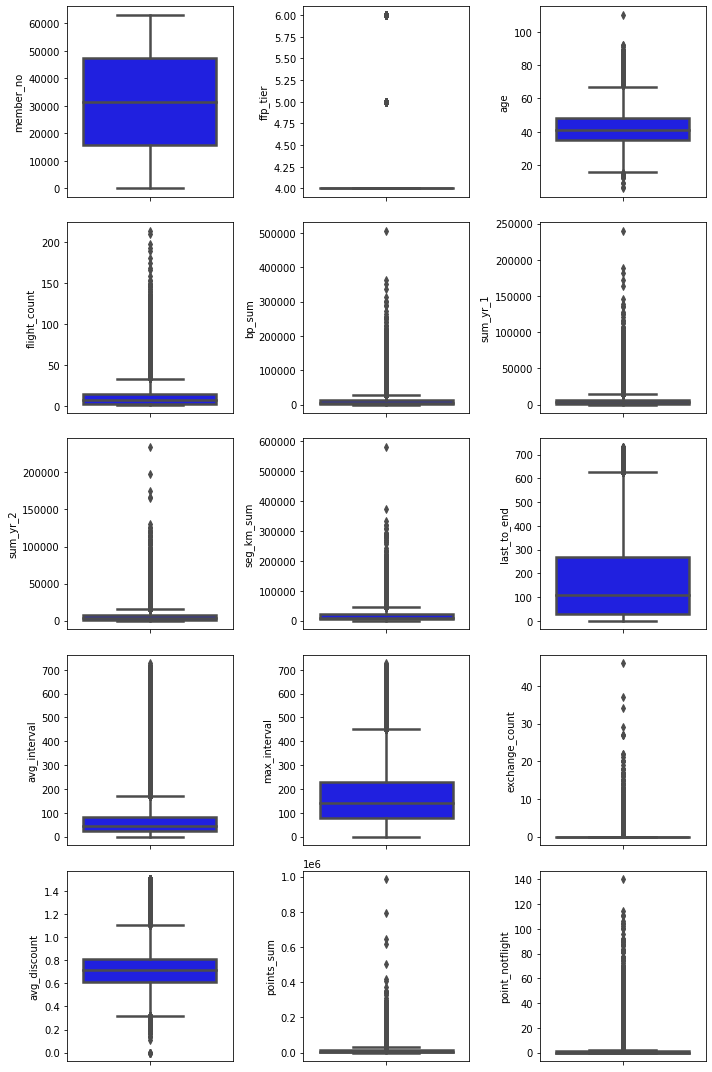

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(5,3, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

Terdapat **outliers** pada semua kolom kecuali kolom member_no

### Violin Plot Kolom Numerik

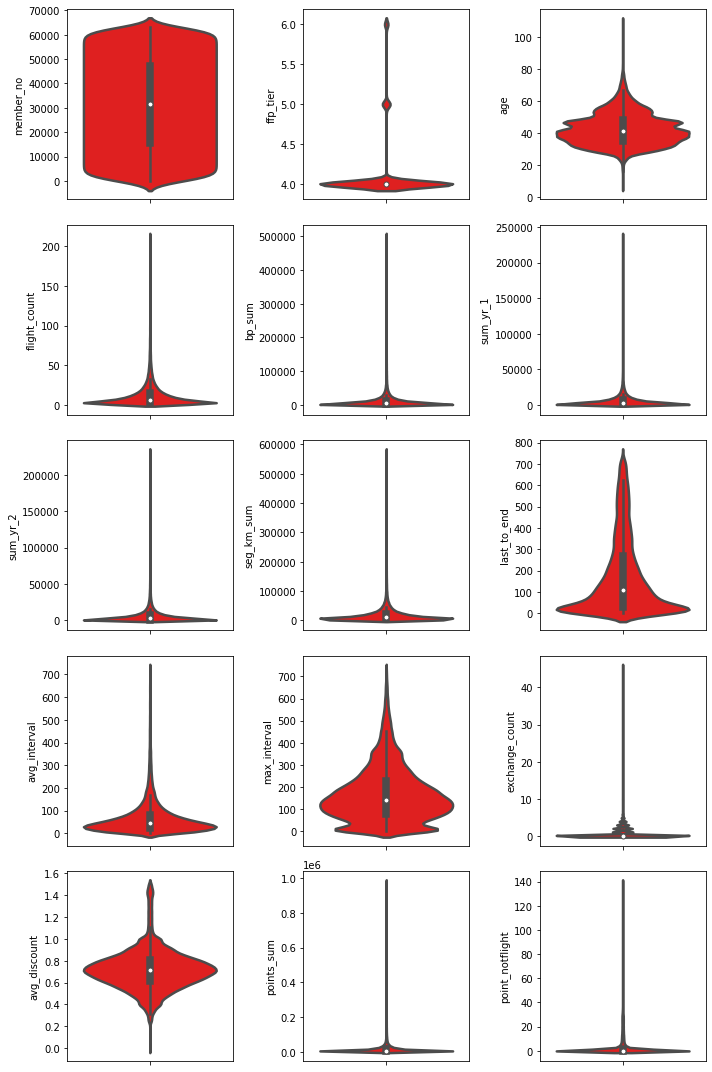

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

### Individual Displot Kolom Numerik

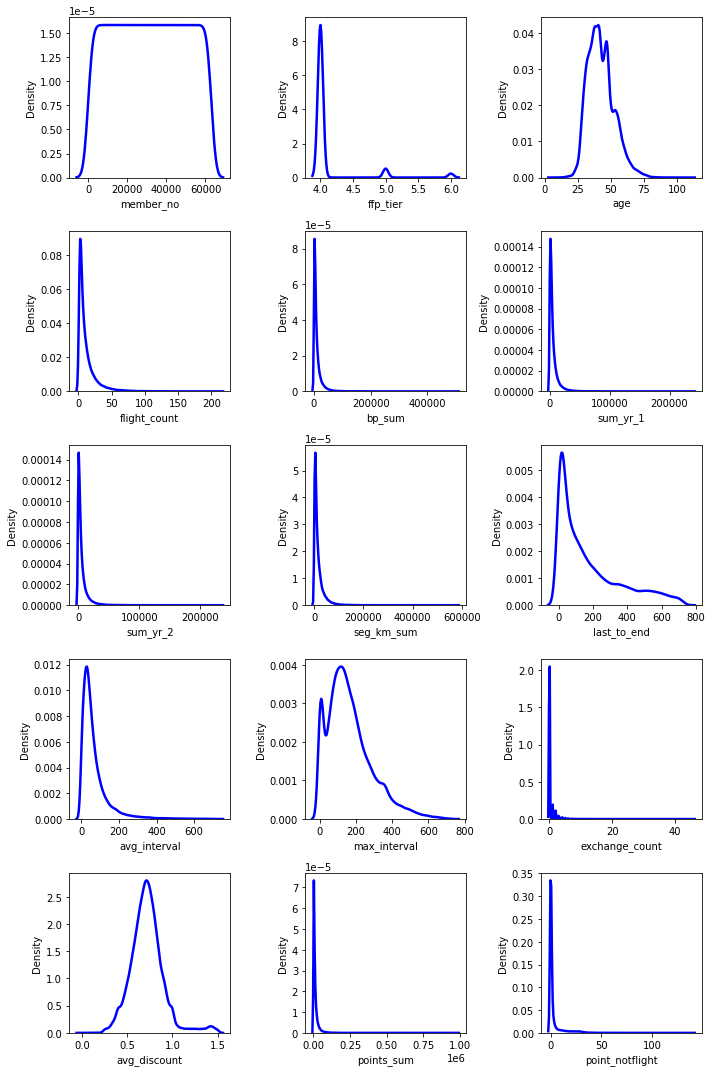

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[nums[i]], color='blue')
    plt.xlabel(nums[i])
    plt.tight_layout()

sebagian besar kolom memiliki skew positive distribution, kecuali kolom member_no, ffp_tier, dan avg_discount

## 3. Multivariate analysis

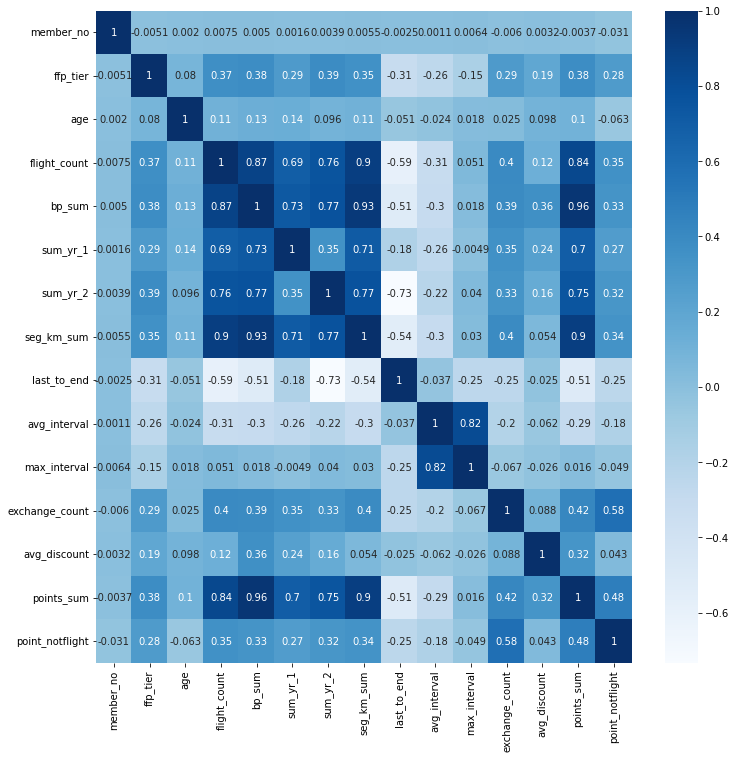

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True)
plt.show()

Korelasi Feature yang tinggi :

1. **FLIGHT_COUNT**(Jumlah penerbangan Customer) berkolerasi tinggi terhadap **SUM_YR_1**(Fare Revenue) 

2. **BP_SUM**(Rencana Perjalanan) berkoleraso tinggi terhadap **SUM_YR_1**(Fare Revenue)

3. **SEG_KM_SUM**(Total jarak(km) penerbangan yg sudah dilakukan) berkolerasi tinggi terhadap **SUM_YR_1**(Fare Revenue)

4. **avg_discount**(Rata rata discount yang didapat customer) berkolerasi tinggi terhadap **FLIGHT_COUNT**(Jumlah penerbangan Customer)

5. **EXCHANGE_COUNT**(Jumlah penukaran) berkolerasi tinggi terhadap **Point_NotFlight**(point yang tidak digunakan oleh members)

6. **Points_Sum**(Jumlah poin yang didapat customer) berkolerasi tinggi terhadap **Point_NotFlight**(point yang tidak digunakan oleh members)

# Preprocessing

In [ ]:
# initialisasi df copy
df1 = df.copy()

In [ ]:
# merubah tipe data ke datetime
df1['ffp_date'] =  df1['ffp_date'].astype('datetime64[ns]')
df1['load_time'] =  df1['load_time'].astype('datetime64[ns]')
df1['first_flight_date'] = df1['load_time'].astype('datetime64[ns]')
df1['last_flight_date'] =df1['load_time'].astype('datetime64[ns]')

## Handle outliers

Dari proses EDA terlihat ada pelanggan yang berusia 110 tahun. Dapat dianggap sebagai anomali, oleh karena itu datanya dihapus

In [ ]:
df1[df1.age > 100]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
23268,20264,2005-04-14,2014-03-31,Female,4,shenzhenshi,guangdong,CN,110.0,2014-03-31,...,2888.0,14053,2014-03-31,361,50.333333,214,1,0.740881,11194,3


In [ ]:
df1.drop(df1[df1.age > 100].index, inplace = True)

Dari hasil observasi sebelumnya terlihat terdapat kolom harga tiket dengan nilai 0. Kemudian juga dilakukan pengecekan terhadap total jarak penerbangan yang telah dilakukan dan rata-rata diskon yang didapatkan.

Di sini kita dapat melihat bahwa ada data penerbangan dengan harga tiket 0, diskon rata-rata adalah 0, tetapi total jarak penerbangan lebih dari 0. Ini dapat dianggap sebagai anomali, dan karena jumlahnya hanya 7 baris, jadi akan di hapus.

In [ ]:
df1[(df1.sum_yr_1 == 0) & (df1.sum_yr_2 == 0) & (df1.avg_discount == 0) & (df1.seg_km_sum > 0)]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
62980,1761,2012-08-07,2014-03-31,Female,4,shenzhen,guangdong,CN,29.0,2014-03-31,...,0.0,6138,2014-03-31,558,12.0,12,0,0.0,0,0
62981,15206,2011-12-02,2014-03-31,Female,4,guangzhou,guangdong,CN,42.0,2014-03-31,...,0.0,2158,2014-03-31,178,3.0,3,0,0.0,0,0
62982,16415,2013-01-20,2014-03-31,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2014-03-31,437,0.0,0,0,0.0,0,0
62983,18375,2011-05-20,2014-03-31,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2014-03-31,297,4.0,4,1,0.0,12318,22
62984,36041,2010-03-08,2014-03-31,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-03-31,89,37.0,60,14,0.0,106972,43
62985,45690,2006-03-30,2014-03-31,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-31,29,166.0,166,0,0.0,0,0
62986,61027,2013-02-06,2014-03-31,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,...,0.0,3934,2014-03-31,400,12.0,12,0,0.0,0,0


In [ ]:
df1.drop(df1[(df1.sum_yr_1 == 0) & (df1.sum_yr_2 == 0) & (df1.avg_discount == 0) & (df1.seg_km_sum > 0)].index, inplace = True)

In [ ]:
# cek jumlah data setelah hapus outlier
print('Total Row', df1.shape[0], ', Total Feature', df1.shape[1],'\n')

Total Row 62980 , Total Feature 23 



## Normalization/Standardization

In [ ]:
df2 = df1.copy()

In [ ]:
df2.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
22413,61589,2011-01-30,2014-03-31,Male,4,shenzhen,guangdongsheng,CN,73.0,2014-03-31,...,6715.0,14692,2014-03-31,168,32.714286,104,0,0.739110,9242,2
31664,46343,2008-04-28,2014-03-31,Male,4,hangzhou,zhejiang,CN,33.0,2014-03-31,...,2118.0,9595,2014-03-31,241,70.400000,273,1,0.721189,6612,1
6154,52792,2010-11-02,2014-03-31,Male,4,tianjin,guangdong,CN,38.0,2014-03-31,...,16788.0,32655,2014-03-31,9,21.058824,118,0,0.924000,29186,1
19449,9483,2008-02-09,2014-03-31,Male,4,shenzhenshi,guangdong,CN,38.0,2014-03-31,...,9185.0,17532,2014-03-31,37,86.500000,553,3,0.717317,10199,3
28547,60803,2013-01-17,2014-03-31,Male,4,guangzhou,guangdong,SG,55.0,2014-03-31,...,2900.0,15022,2014-03-31,164,55.200000,261,0,0.532944,5472,0


Untuk kolom 'avg_discount' akan menggunakan standardisasi, karena distribusinya terlihat normal. Sedangkan kolom 'member_duration', 'last_to_end', 'flight_count', 'seg_km_sum' akan menggunakan normalisasi, karena memiliki positive skewed distribution

In [ ]:
# sebelum scaling
df2.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000
mean,31495.09030,4.10218,42.46621,11.84055,10926.29601,5333.60270,5598.48874,17125.38895,176.10518,67.75388,166.04751,0.31956,0.72164,12545.29889,2.72742
std,18183.15941,0.37388,9.85010,14.04999,16340.11791,8077.72467,8695.17763,20961.70085,183.81913,77.51972,123.39592,1.13476,0.18528,20505.36192,7.36244
min,1.00000,4.00000,6.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,15747.75000,4.00000,35.00000,3.00000,2518.00000,1020.00000,785.00000,4748.00000,29.00000,23.37384,79.00000,0.00000,0.61202,2775.00000,0.00000
50%,31495.50000,4.00000,41.00000,7.00000,5701.00000,2800.00000,2773.00000,9996.00000,107.00000,44.66667,143.00000,0.00000,0.71189,6329.00000,0.00000
75%,47242.25000,4.00000,48.00000,15.00000,12832.50000,6525.00000,6828.00000,21273.25000,267.00000,82.00000,228.00000,0.00000,0.80950,14304.00000,1.00000
max,62988.00000,6.00000,92.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['last_to_end', 'flight_count', 'seg_km_sum']

for col in norm_col:
  df2[col + '_norm'] = MinMaxScaler().fit_transform(df2[col].values.reshape(len(df2), 1))

# Standardization
df2['avg_discount_std'] = StandardScaler().fit_transform(df2['avg_discount'].values.reshape(len(df2), 1))

In [ ]:
# setelah scaling
df2.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,last_to_end_norm,flight_count_norm,seg_km_sum_norm,avg_discount_std
count,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000,62980.00000
mean,31495.09030,4.10218,42.46621,11.84055,10926.29601,5333.60270,5598.48874,17125.38895,176.10518,67.75388,166.04751,0.31956,0.72164,12545.29889,2.72742,0.23987,0.04664,0.02887,-0.00000
std,18183.15941,0.37388,9.85010,14.04999,16340.11791,8077.72467,8695.17763,20961.70085,183.81913,77.51972,123.39592,1.13476,0.18528,20505.36192,7.36244,0.25181,0.06659,0.03612,1.00001
min,1.00000,4.00000,6.00000,2.00000,0.00000,0.00000,0.00000,368.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-3.89483
25%,15747.75000,4.00000,35.00000,3.00000,2518.00000,1020.00000,785.00000,4748.00000,29.00000,23.37384,79.00000,0.00000,0.61202,2775.00000,0.00000,0.03836,0.00474,0.00755,-0.59165
50%,31495.50000,4.00000,41.00000,7.00000,5701.00000,2800.00000,2773.00000,9996.00000,107.00000,44.66667,143.00000,0.00000,0.71189,6329.00000,0.00000,0.14521,0.02370,0.01659,-0.05263
75%,47242.25000,4.00000,48.00000,15.00000,12832.50000,6525.00000,6828.00000,21273.25000,267.00000,82.00000,228.00000,0.00000,0.80950,14304.00000,1.00000,0.36438,0.06161,0.03602,0.47420
max,62988.00000,6.00000,92.00000,213.00000,505308.00000,239560.00000,234188.00000,580717.00000,731.00000,728.00000,728.00000,46.00000,1.50000,985572.00000,140.00000,1.00000,1.00000,1.00000,4.20099


# Feature Engineering

* Membuat kolom membership Duration (dalam bulan)

  Dengan mengurangkan terakhir kali dataset diambil dengan saat bergabung menjadi anggota, kita dapat memperoleh data durasi keanggotaan, yang memnunjukan apakah anggota tersebut adalah pelanggan lama atau baru.

In [ ]:
# buat kolom baru member_duartion
df2['member_duration'] = ((df2['load_time'] - df2['ffp_date'])/np.timedelta64(1, 'M'))

In [ ]:
# rubah datatype kolom member_duration
df2['member_duration'] = df2['member_duration'].astype(int)

In [ ]:
 # Normalization kolom baru 'member_duration'
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['member_duration']

for col in norm_col:
  df2[col + '_norm'] = MinMaxScaler().fit_transform(df2[col].values.reshape(len(df2), 1))

In [ ]:
df2.sample(2)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,exchange_count,avg_discount,points_sum,point_notflight,last_to_end_norm,flight_count_norm,seg_km_sum_norm,avg_discount_std,member_duration,member_duration_norm
7454,21143,2006-08-24,2014-03-31,Male,4,guangzhou,shandong,CN,47.0,2014-03-31,...,9,0.693887,25729,9,0.093151,0.146919,0.065876,-0.149777,91,0.792079
30786,19549,2010-04-09,2014-03-31,Male,4,guangzhou,guangdong,CN,35.0,2014-03-31,...,0,0.654027,6285,0,0.131507,0.023697,0.018358,-0.364907,47,0.356436


## Feature Selection

RFM Metric


1. Recency, menunjukkan waktu interaksi terakhir pelanggan dengan produk dalam periode waktu tertentu.

  Recency -> kolom last_to_end. Jarak dari waktu penerbangan terakhir ke pesanan penerbangan terakhir.


2. Frequency, menunjukan berapa kali pelanggan berinteraksi dengan produk atau melakukan transaksi dalam periode waktu tertentu.

   Frequency -> kolom flight_count. Jumlah penerbangan pelanggan


3. Monetary, menunjukkan jumlah total yang dihabiskan oleh pelanggan untuk membeli produk Anda dalam periode waktu tertentu.

   Monetary -> kolom seg_km_sum. Untuk jumlah monetary, sebagai penyesuaian dalam bisnis penerbangan, fitur ini diganti dengan akumulasi jam terbang dalam jangka waktu tertentu.

Kolom yang juga dianggap penting juga, yaitu:
* Loyalty -> kolom member_duration. Lama keanggotaan, yang mencerminkan apakah anggota adalah pelanggan yang loyal atau tidak.
* Cabin -> kolom avg_discount. Faktor diskon terkait dengan kelas kabin, mencerminkan nilai pelanggan yang tinggi dan rendah.



In [ ]:
df2_std = df2.copy()
df2_std = df2_std[['member_duration_norm', 'last_to_end_norm', 'flight_count_norm', 'seg_km_sum_norm', 'avg_discount_std']]

In [ ]:
df2_std.sample(5)

,member_duration_norm,last_to_end_norm,flight_count_norm,seg_km_sum_norm,avg_discount_std
54007,0.019802,0.379452,0.000000,0.009160,-1.843891
19713,0.623762,0.010959,0.066351,0.031393,-0.295126
54888,0.267327,0.716438,0.004739,0.005498,-0.827262
44440,0.990099,0.426027,0.014218,0.008111,0.064808
2818,0.089109,0.046575,0.014218,0.104751,0.088311


# Modeling + Evaluasi

## Elbow Method & Silhoutte Score

In [ ]:
inertia = list() # list to save inertia's score
silhoutte = list() # list to save silhoutte's score
nilai_k = range(1,16) # 1 sampai 15

for k in nilai_k :
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df2_std)

    #Elbow
    inertia.append(model.inertia_)

    if k != 1: # silhoutte dimulai dari 2
      #Silhoutte Score
      pred = model.predict(df2_std)
      score_euclidean = silhouette_score(df2_std, pred, metric='euclidean')
      silhoutte.append(score_euclidean)

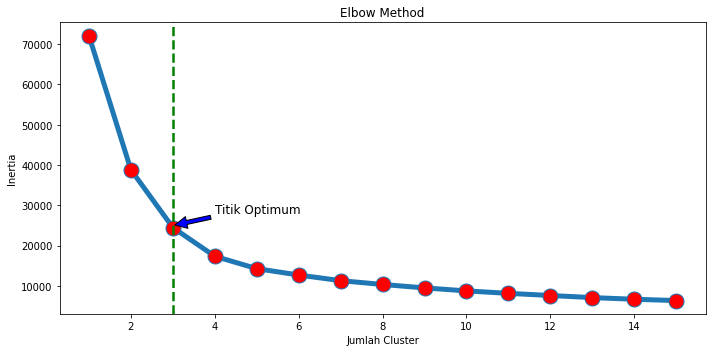

In [ ]:
#Elbow Plot

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(nilai_k, inertia, '-o', linewidth=5, markersize=15, markerfacecolor='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(x=3, color='green', linestyle='--')
plt.annotate('Titik Optimum', xytext=(4,28000), xy=(3,25000),  arrowprops = dict(facecolor ='blue',
                                  shrink = 0.05), fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# cari nilai siku
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0     33291.123455
1     14336.481039
2      7131.830320
3      3064.814164
4      1591.110676
5      1391.589706
6       952.257415
7       846.324578
8       747.212310
9       606.382823
10      536.324869
11      520.580002
12      411.207707
13      320.829337
14             NaN
dtype: float64

**Observasi**<br>
Terlihat bahwa *nilai k* yang paling optimal adalah 3

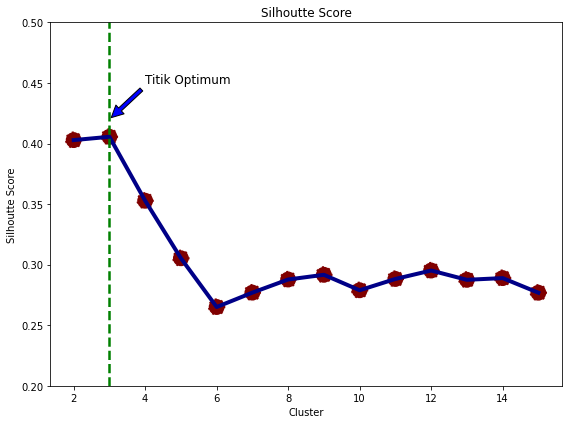

In [ ]:
# Silhoutte Score Plot

plt.figure(figsize=(8, 6))
sns.lineplot(x=nilai_k[1:], y=silhoutte, color='#000087', linewidth = 4)
sns.scatterplot(x=nilai_k[1:], y=silhoutte, s=300, color='#800000',  linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score')
plt.axvline(x=3, color='green', linestyle='--')
plt.annotate('Titik Optimum', xytext=(4,0.45), xy=(3,0.42),  arrowprops = dict(facecolor ='blue',
                                  shrink = 0.05), fontsize=12)
plt.ylim(0.20, 0.50)
plt.tight_layout()
plt.show()

**Observasi**<br>
Terlihat bahwa *nilai k* yang paling optimal adalah 3 karena lebih dekat dengan 1


## Clustering with K-Means

In [ ]:
#Clustering with K-Means

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df2_std)
label = kmeans.labels_

## Evaluate Cluster

In [ ]:
#Evaluate Cluster

# PCA for Visualization
pca = PCA(n_components=2)
pca.fit(df2_std)
X_pca = pca.transform(df2_std)

In [ ]:
#make PCA dataframe's
df_pca = pd.DataFrame(X_pca, columns=['pca1','pca2'])
df_pca['cluster'] = label

In [ ]:
#get five sample
df_pca.sample(5)

,pca1,pca2,cluster
32756,1.140545,-0.217888,0
43066,-0.250290,0.157969,1
30868,-0.609298,-0.335567,1
46834,0.103183,0.171914,0
29815,1.134393,0.406236,0


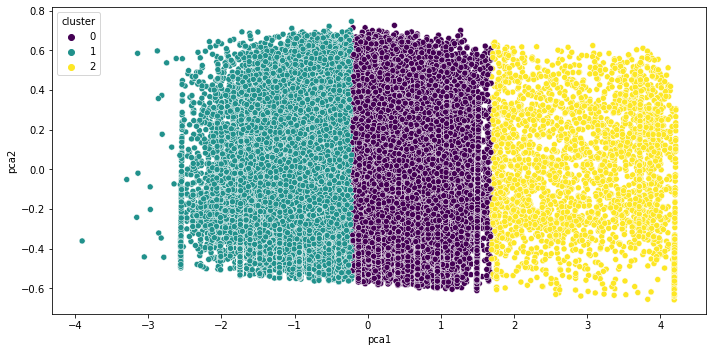

In [ ]:
# Plot PCA
plt.figure(figsize=(10,5))
sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = df_pca, palette = 'viridis')
plt.tight_layout()
plt.show()

# Interpretasi Model + Rekomendasi Bisnis

In [ ]:
# ambil data yang asli dengan feature yang dipilih dan tempelkan label

rfm_col = ['member_duration', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount']

df_last = df2[rfm_col].copy()
df_last['cluster'] = label

In [ ]:
# ambil tiga contoh dengan label
df_last.sample(3)

,member_duration,last_to_end,flight_count,seg_km_sum,avg_discount,cluster
10917,31,100,15,28766,0.715329,0
51993,14,156,4,4544,0.540552,1
59997,13,393,2,2094,0.600000,1


In [ ]:
#cari statistik berdasarkan cluster
df_last.groupby('cluster').describe().T

cluster                            0              1              2
member_duration count   34241.000000   26100.000000    2639.000000
                mean       49.155077      46.406130      55.648352
                std        27.729117      27.615840      29.453615
                min        11.000000      11.000000      11.000000
                25%        24.000000      22.000000      28.000000
                50%        43.000000      39.000000      53.000000
                75%        72.000000      69.000000      81.000000
                max       112.000000     112.000000     112.000000
last_to_end     count   34241.000000   26100.000000    2639.000000
                mean      174.160831     181.205709     150.888215
                std       185.313608     182.402405     175.628114
                min         1.000000       1.000000       1.000000
                25%        27.000000      33.000000      18.000000
                50%       103.000000     116.000000      78.000000
                75%       261.000000     280.000000     222.500000
                max       730.000000     731.000000     718.000000
flight_count    count   34241.000000   26100.000000    2639.000000
                mean       13.323501       9.470153      16.042819
                std        15.550167      10.578174      19.113406
                min         2.000000       2.000000       2.000000
                25%         4.000000       3.000000       4.000000
                50%         8.000000       6.000000       9.000000
                75%        17.000000      12.000000      21.000000
                max       210.000000     197.000000     213.000000
seg_km_sum      count   34241.000000   26100.000000    2639.000000
                mean    18457.023889   14706.763142   23767.913225
                std     22777.368375   16719.732749   29416.381811
                min       368.000000     368.000000     368.000000
                25%      4829.000000    4609.000000    5363.000000
                50%     10717.000000    8999.000000   12726.000000
                75%     23117.000000   18433.000000   30395.500000
                max    580717.000000  275800.000000  293678.000000
avg_discount    count   34241.000000   26100.000000    2639.000000
                mean        0.798253       0.565561       1.271173
                std         0.084115       0.093860       0.145862
                min         0.679352       0.000000       1.033318
                25%         0.729811       0.512738       1.136490
                50%         0.781678       0.589475       1.275033
                75%         0.850000       0.640000       1.410000
                max         1.035191       0.683541       1.500000

In [ ]:
# rata-rata tiap klaster
df_last.groupby('cluster').mean()

,member_duration,last_to_end,flight_count,seg_km_sum,avg_discount
cluster,,,,,
0,49.155077,174.160831,13.323501,18457.023889,0.798253
1,46.406130,181.205709,9.470153,14706.763142,0.565561
2,55.648352,150.888215,16.042819,23767.913225,1.271173


**Interpretasi**<br>
Berdasarkan hasil clustering dan deskriptif diatas dapat disimpulkan bahwa,
segmentasi pelanggan terbagi menjadi tiga jenis

1. Silver/Low (Klaster 1), Pelanggan yang paling sedikit melakukan penerbangan, sedikit pengeluaran, low recency, low duration, low discount
2. Gold/Mid (Klaster 0), Pelanggan yang diantara C1 dan C2 dalam melakukan penerbangan, biaya pengeluaran sedang, mid recency, mid duration, mid discount
3. Platinum/High (Klaster 3), Pelanggan yang paling banyak melakukan penerbangan, banyak pengeluaran, high recency, high duration, high discount

**Rekomendasi**<br>
1. Memberikan penawaran khusus seperti diskon tiket agar semakin sering melakukan penerbangan
2. Memberikan reward kepada pelanggan seperti poin, coupon atau yang dapat ditukarkan sebagai hadiah
3. Merekomendasikan paket berlanggan dengan biaya sesuai segmentasi pelanggan
